In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [2]:
iris = pd.read_excel("iris.xls")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
def make_color(value):
    color = 'yellow'
    if value == 0:
        color = 'red'
    elif value == 1:
        color = 'green'
    else:
        color = 'blue'


In [5]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2} #hoac co the dung labelEncoder
iris['species_num'] = [iris_class[i] for i in iris.iris]
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
X = iris.drop(['iris', 'species_num'], axis =1 )#input
y = iris.species_num #output

In [15]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
#-> du lieu co cung do dai voi nhau la cm nen khong can scale
#-> du lieu co 3 lop, moi lop 50 mau nen k can resample data

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
list_k = []
list_acc = []
#khi chung ta co cac ket qua la nhu nhau duoi model
list_score_train = []
list_score_test = []

list_d = [] #train - test
for K_value in range(2,8): #K_value = 2->7
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_pred, y_test) * 100
    #lam them 
    train_score = neigh.score(X_train, y_train)
    test_score = neigh.score(X_test, y_test)
    list_acc.append(acc)
    list_score_train.append(train_score)
    list_score_test.append(test_score)
    d = abs(train_score - test_score)
    list_d.append(d)
    print("Accurancy is ", accuracy_score(y_pred, y_test)* 100, "% for K_value", K_value)
    
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]

print("\nThe optimal number of neighbors is %d with %0.1f%%" %(k, list_acc[vi_tri]))
    

Accurancy is  100.0 % for K_value 2
Accurancy is  100.0 % for K_value 3
Accurancy is  100.0 % for K_value 4
Accurancy is  100.0 % for K_value 5
Accurancy is  100.0 % for K_value 6
Accurancy is  96.66666666666667 % for K_value 7

The optimal number of neighbors is 2 with 100.0%


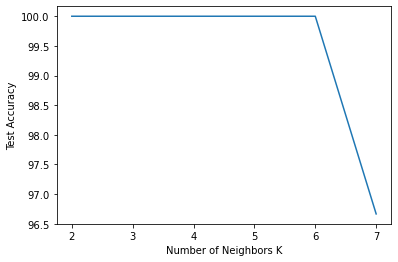

In [25]:
plt.plot(list_k, list_acc)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Test Accuracy")
plt.show()

In [34]:
#select k => ap dung model(dua tren k o tren)
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [35]:
y_predict = knn.predict(X_test)

In [36]:
#kiem tra do chinh xac
print("The prediction accuracy is : ", knn.score(X_train, y_train))
print("The test accuracy is : ", knn.score(X_test, y_test))

The prediction accuracy is :  0.9666666666666667
The test accuracy is :  1.0


In [37]:
import pickle 
pkl_filename = "knn_c_model.pkl"
with open(pkl_filename, "wb") as file:
    pickle.dump(knn, file)

In [38]:
pkl_filename = "knn_c_model.pkl"
with open(pkl_filename, "rb") as file:
    knn_model = pickle.load(file)

In [41]:
x_now = [[4.8, 3.3, 1.6, 0.25]]
y_now = knn_model.predict(x_now)
y_now

array([0], dtype=int64)